In [ ]:
import pandas as pd

lyrics = pd.read_csv('lyrics.csv')

In [ ]:
lyrics

,Unnamed: 0.3,Unnamed: 0.2,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,...,Adverbs,Corpus,Word Counts,Unique Word Counts,Unnamed: 0.1,Unnamed: 0,Cleaned_Title,Cleaned_Artist,link,lyrics
0,0,0,Battle of New Orleans,https://genius.com/albums/Johnny-horton/Battle...,Johnny Horton,[],In 1814 we took a little trip Along with Colo...,[{'native_uri': 'spotify:track:0dwpdcQkeZqpuoA...,1,1959-04-01,...,along as ago once more so as ago once more the...,take little trip Colonel Jackson mighty Missis...,500,152,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,That’s All,https://genius.com/albums/Bobby-darin/That-s-all,Bobby Darin,[],Oh the shark babe Has such teeth dear And he...,[{'native_uri': 'spotify:track:3E5ndyOfO6vFDEI...,2,NaN,...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,235,135,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,“Mr Personality’s” 15 Big Hits,https://genius.com/albums/Lloyd-price/Mr-perso...,Lloyd Price,[],Over and over I tried to prove my love to you ...,"[{'provider': 'youtube', 'start': 0, 'type': '...",3,NaN,...,over over over over over over so over now over...,try prove love friend say fool fool cause get ...,226,54,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,The Greatest Hits Of Frankie Avalon,https://genius.com/albums/Frankie-avalon/The-g...,Frankie Avalon,[],Hey Venus Oh Venus Venus if you will Ple...,[],4,NaN,...,surely too always as long surely too always as...,hey Venus oh Venus Venus send little girl thri...,170,74,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,Paul Anka Sings His Big 15,https://genius.com/albums/Paul-anka/Paul-anka-...,Paul Anka,[],I m just a lonely boy Lonely and blue I m all ...,[],5,NaN,...,just all just all just so hard just all,lonely boy lonely blue get think want love yes...,153,66,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408,6408,6408,NaN,NaN,Nate Smith,NaN,Usually these ol neon lights Are pretty good ...,NaN,96,NaN,...,NaN,NaN,303,118,495.0,495.0,"""Bulletproof""",Nate-Smith,https://genius.com/Nate-smith-bulletproof-lyrics,"{'_type': 'lyrics', 'api_path': '/songs/100348..."
6409,6409,6409,NaN,NaN,Travis Scott featuring Playboi Carti,NaN,Just come outside for the night Yeah Take you...,NaN,97,NaN,...,NaN,NaN,514,201,496.0,496.0,"""Fen""",Travis-Scott,https://genius.com/Travis-scott-fe-n-lyrics,"{'_type': 'lyrics', 'api_path': '/songs/936845..."
6410,6410,6410,NaN,NaN,Cody Johnson,NaN,She talks about the future like shes flippin ...,NaN,98,NaN,...,NaN,NaN,262,106,497.0,497.0,"""The-Painter""",Cody-Johnson,https://genius.com/Cody-johnson-the-painter-ly...,"{'_type': 'lyrics', 'api_path': '/songs/939298..."
6411,6411,6411,NaN,NaN,Taylor Swift,NaN,Did you really beam me up In a cloud of spark...,NaN,99,NaN,...,NaN,NaN,472,142,498.0,498.0,"""Down-Bad""",Taylor-Swift,https://genius.com/Taylor-swift-down-bad-lyrics,"{'_type': 'lyrics', 'api_path': '/songs/100245..."


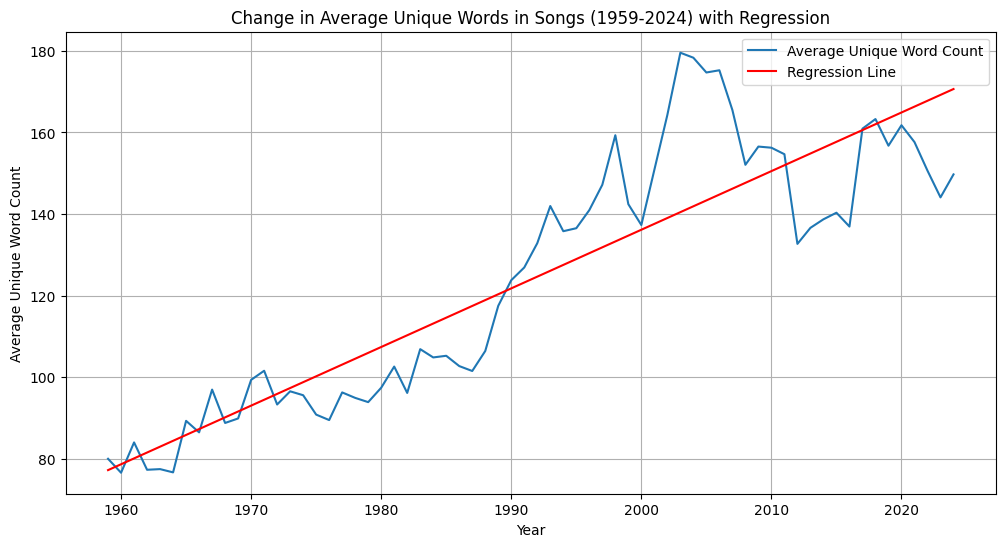

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

lyrics = pd.read_csv('lyrics.csv')

average_unique_words_by_year = lyrics.groupby('Year')['Unique Word Counts'].mean()

x = average_unique_words_by_year.index.values.reshape(-1, 1)
y = average_unique_words_by_year.values

coefficients = np.polyfit(x.flatten(), y, 1)
polynomial = np.poly1d(coefficients)
regression_line = polynomial(x)


plt.figure(figsize=(12, 6))
plt.plot(average_unique_words_by_year.index, average_unique_words_by_year.values, label='Average Unique Word Count')
plt.plot(x, regression_line, color='red', label='Regression Line') #regression

plt.xlabel('Year')
plt.ylabel('Average Unique Word Count')
plt.title('Change in Average Unique Words in Songs (1959-2024) with Regression')
plt.grid(True)
plt.legend()
plt.savefig('unique_count.png')

# Display the plot
plt.show()

In [ ]:
lyrics_by_year = {}
for year in lyrics['Year'].unique():
    lyrics_by_year[year] = ' '.join(lyrics[lyrics['Year'] == year]['Lyrics'].astype(str))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import regex as re

word_df = pd.DataFrame(lyrics_by_year.items(), columns=['year', 'lyrics'])
word_df

,year,lyrics
0,1959.0,In 1814 we took a little trip Along with Colo...
1,1960.0,There s a summer place Where it may rain or st...
2,1961.0,I couldn t sleep at all last night Just a thin...
3,1962.0,I can t stop loving you I ve made up my min...
4,1963.0,There s a crazy little shack beyond the tracks...
...,...,...
61,2020.0,Yeah Ive been tryna call Ive been on my own f...
62,2021.0,If you wanna run away with me I know a galaxy...
63,2022.0,Last night all I think about is you Dont stop...
64,2023.0,Last night we let the liquor talk I cant reme...


In [ ]:
import nltk
from nltk.corpus import stopwords
import spacy

In [ ]:

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
nlp = spacy.blank("en")  # Load blank model
stop_words_spacy = nlp.Defaults.stop_words

# Ensure Stopwords are Downloaded
nltk.download("stopwords")
custom_stopwords = {
    # Common function words (overlap with NLTK/SpaCy)
    "i", "you", "me", "we", "he", "she", "it", "they", "them", "my", "mine", "your", "yours", "our", "ours", "their", "theirs",
    "a", "an", "the", "of", "in", "to", "for", "with", "on", "at", "by", "about", "as", "into", "over", "after", "between",
    "and", "or", "but", "so", "because", "if", "when", "where", "how", "than",

    # Common verbs (auxiliary + generic actions)
    "be", "am", "im", "is", "are", "was", "were", "been", "being", "have", "has", "had",
    "do", "does", "did", "will", "would", "shall", "should", "can", "could", "may", "might", "must",
    "get", "got", "make", "made", "take", "took", "come", "go", "gone", "going",

    # Fillers & Conversational Slang
    "yeah", "uh", "oh", "hey", "ho", "woah", "nah", "la", "da", "ya", "gotta", "wanna", "aint", "ooh",
    "hmm", "ah", "nah", "whoa", "uhh", "woo", "yeah", "whoa", "whoop", "eh", "yea", "dont"

    # Generic phrases that don't add meaning
    "ooh", "ahh", "thats", "thing", "somethin", "way", "gonna", "tell", "like", "let", "lil", "yeah", "whoa", "youre", "gon", "bout", "yo", "nah", "woo", "do", "ive", "wont", "na", "uh", "oh", "niggas", "ill", "te", "de", "nigga", "tryna", "que", "em", "cant", "dont", "want", "tryna", "cause"}


# Merge all stopword sources
all_stopwords = stop_words.union(stop_words_spacy).union(custom_stopwords)

# Ensure Stopwords are Downloaded
nltk.download("stopwords")

def count_words_by_year(lyrics):
    word_counts_by_year = {}
    for year in lyrics['Year'].unique():
        text = ' '.join(lyrics[lyrics['Year'] == year]['Lyrics'].astype(str))
        words = re.findall(r'\b\w+\b', text.lower())  # Extract words, lowercase
        word_counts = Counter(words)
        word_counts_by_year[year] = word_counts
    return word_counts_by_year


# Get word counts
word_counts_by_year = count_words_by_year(lyrics)
word_counts_df = pd.DataFrame.from_dict(word_counts_by_year, orient='index').fillna(0).astype(int)

# Remove Stopword Columns
word_counts_df_cleaned = word_counts_df.drop(columns=[col for col in word_counts_df.columns if col.lower() in all_stopwords], errors="ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
word_totals = word_counts_df_cleaned.sum(axis=0)

top_words = word_totals.nlargest(50)

top_words_df = top_words.reset_index()
top_words_df.columns = ["Word", "Total Count"]

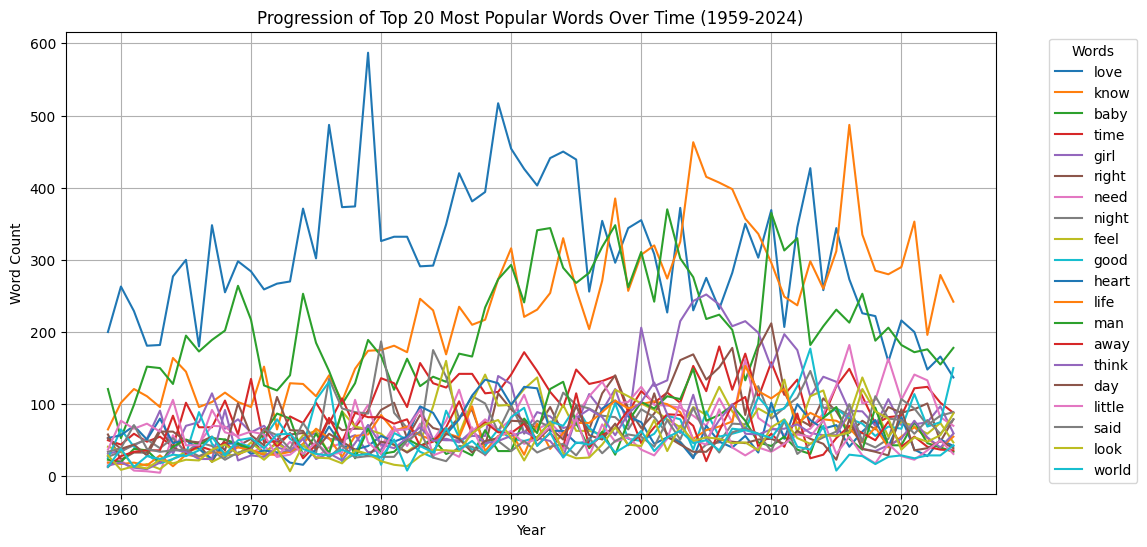

In [ ]:
top_words = word_totals.nlargest(20).index.tolist()

top_words_df = word_counts_df[top_words]

top_words_df = top_words_df.reset_index().rename(columns={'index': 'Year'})

top_words_df['Year'] = pd.to_numeric(top_words_df['Year'])

plt.figure(figsize=(12, 6))

for word in top_words:
    plt.plot(top_words_df['Year'], top_words_df[word], label=word)

plt.xlabel("Year")
plt.ylabel("Word Count")
plt.title("Progression of Top 20 Most Popular Words Over Time (1959-2024)")
plt.legend(title="Words", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig('overal_popular_words.png')

plt.show()

In [ ]:
filtered_df = word_counts_df_cleaned.loc[(word_counts_df_cleaned.index >= 2015) & (word_counts_df_cleaned.index <= 2019)]
# filtered_df = filtered_df.drop(columns=[word for word in top_words if word not in filtered_df.columns], errors="ignore")

In [ ]:
filtered_df = word_counts_df_cleaned.loc[word_counts_df_cleaned.index >= 2020]
filtered_df = filtered_df.drop(columns=[word for word in top_words if word in filtered_df.columns], errors="ignore")

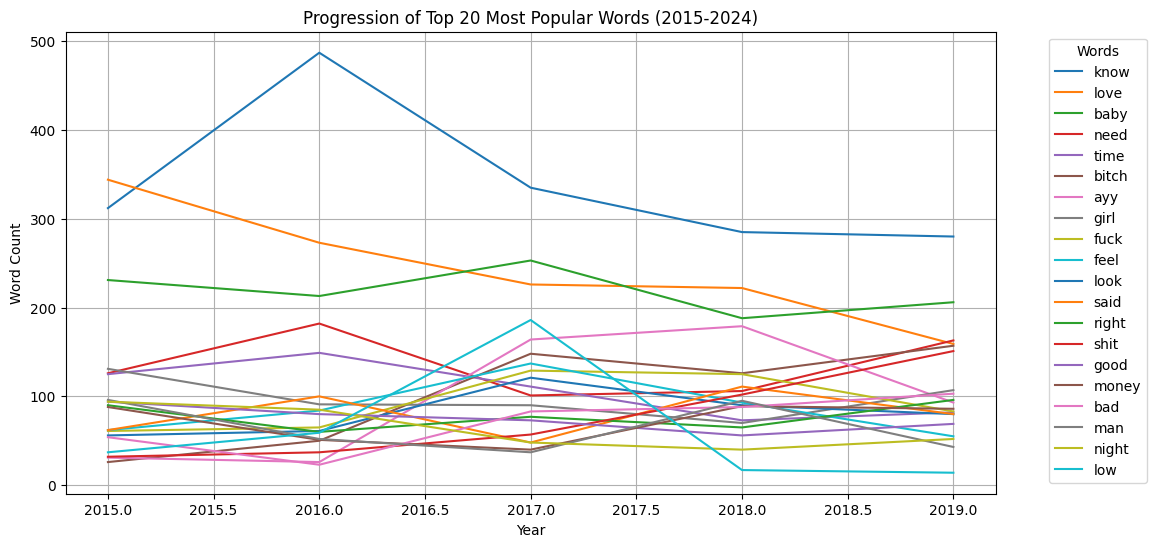

In [ ]:
top_words = filtered_df.sum().nlargest(20).index.tolist()

top_words_df = filtered_df[top_words]

top_words_df = top_words_df.reset_index().rename(columns={'index': 'Year'})

top_words_df['Year'] = pd.to_numeric(top_words_df['Year'])

plt.figure(figsize=(12, 6))

for word in top_words:
    plt.plot(top_words_df['Year'], top_words_df[word], label=word)

plt.xlabel("Year")
plt.ylabel("Word Count")
plt.title("Progression of Top 20 Most Popular Words (2015-2024)")
plt.legend(title="Words", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig('recent_popular_words.png')

plt.show()

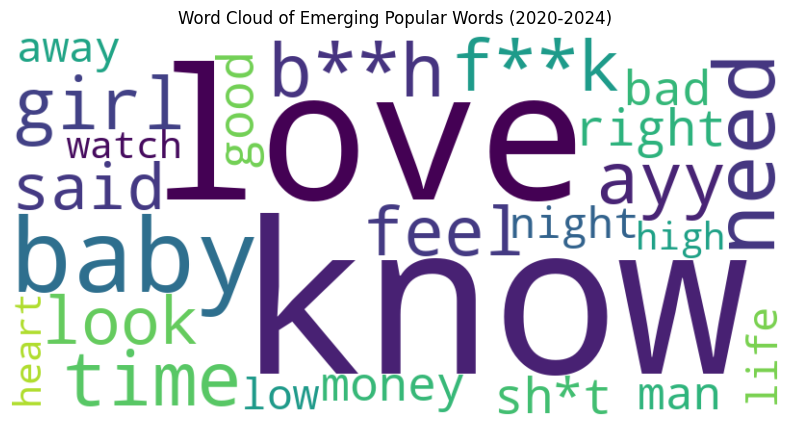

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_totals = filtered_df.sum()

word_totals = word_totals.dropna()
word_totals = word_totals[word_totals > 0]

top_words = word_totals.nlargest(25)

word_freq = dict(zip(top_words.index, top_words.values))

word_freq["f**k"] = word_freq.pop("fuck", word_freq.get("fuck", 0))
word_freq["b**h"] = word_freq.pop("bitch", word_freq.get("bitch", 0))
word_freq["sh*t"] = word_freq.pop("shit", word_freq.get("shit", 0))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Emerging Popular Words (2020-2024)")
plt.savefig('popular_2015.png')
plt.show()

In [ ]:
labeled = pd.read_csv("songs_genre_labeled_2020-2024.csv")

In [ ]:
labeled

,Year,Title,Artist,Rank,lyrics_cleaned,cluster,predicted_genre,predicted_genre_sl,predicted_genre_svc,predicted_genre_nb,predicted_genre_xgb
0,2020,"""Blinding Lights""",The Weeknd,1,Yeah Ive been tryna call Ive been on my own f...,4,R&B,Pop,Pop,Pop,Pop
1,2020,"""Circles""",Post Malone,2,Oh oh oh Oha oh oh Oha oh oh oh oh We couldnt...,4,R&B,Pop,Pop,Rock,Pop
2,2020,"""The Box""",Roddy Ricch,3,Pullin out the coupe at the lot Told em fuck ...,4,Hip-Hop,Pop,Pop,Pop,Pop
3,2020,"""Don't Start Now""",Dua Lipa,4,If you dont wanna see me Did a full oneeighty...,4,Hip-Hop,Pop,Pop,Pop,Pop
4,2020,"""Rockstar""",DaBaby featuring Roddy Ricch,5,Woo woo I pull up like How you pull up Baby H...,4,Hip-Hop,Pop,Pop,Pop,Pop
...,...,...,...,...,...,...,...,...,...,...,...
495,2024,"""Bulletproof""",Nate Smith,96,Usually these ol neon lights Are pretty good ...,4,Hip-Hop,Pop,Pop,Pop,Rock
496,2024,"""Fe!n""",Travis Scott featuring Playboi Carti,97,Just come outside for the night Yeah Take you...,4,Hip-Hop,Pop,Pop,Pop,Pop
497,2024,"""The Painter""",Cody Johnson,98,She talks about the future like shes flippin ...,4,Hip-Hop,Rock,Rock,Rock,Rock
498,2024,"""Down Bad""",Taylor Swift,99,Did you really beam me up In a cloud of spark...,4,Hip-Hop,Metal,Metal,Pop,Rock


In [ ]:
labeled["predicted_genre"].value_counts()

,count
predicted_genre,
Hip-Hop,324
R&B,139
Pop,29
Country,6
Metal,2


In [ ]:
labeled["predicted_genre_nb"].value_counts()

,count
predicted_genre_nb,
Pop,371
Rock,129


In [ ]:
labeled.head(50)

,Year,Title,Artist,Rank,lyrics_cleaned,cluster,predicted_genre,predicted_genre_sl,predicted_genre_svc,predicted_genre_nb,predicted_genre_xgb
0,2020,"""Blinding Lights""",The Weeknd,1,Yeah Ive been tryna call Ive been on my own f...,4,R&B,Pop,Pop,Pop,Pop
1,2020,"""Circles""",Post Malone,2,Oh oh oh Oha oh oh Oha oh oh oh oh We couldnt...,4,R&B,Pop,Pop,Rock,Pop
2,2020,"""The Box""",Roddy Ricch,3,Pullin out the coupe at the lot Told em fuck ...,4,Hip-Hop,Pop,Pop,Pop,Pop
3,2020,"""Don't Start Now""",Dua Lipa,4,If you dont wanna see me Did a full oneeighty...,4,Hip-Hop,Pop,Pop,Pop,Pop
4,2020,"""Rockstar""",DaBaby featuring Roddy Ricch,5,Woo woo I pull up like How you pull up Baby H...,4,Hip-Hop,Pop,Pop,Pop,Pop
5,2020,"""Adore You""",Harry Styles,6,Walk in your rainbow paradise Paradise Strawb...,4,R&B,Jazz,Pop,Pop,Pop
6,2020,"""Life Is Good""",Future featuring Drake,7,Workin on a weekend like usual Way off in the...,4,Hip-Hop,Pop,Pop,Pop,Pop
7,2020,"""Memories""",Maroon 5,8,Heres to the ones that we got Cheers to the w...,4,Hip-Hop,Pop,Pop,Pop,Pop
8,2020,"""The Bones""",Maren Morris,9,Were in the homestretch of the hard times We ...,4,R&B,Pop,Pop,Rock,Pop
9,2020,"""Someone You Loved""",Lewis Capaldi,10,Im going under and this time I fear theres no...,4,R&B,Rock,Metal,Rock,Pop
